<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_149_p_164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 순전파: forward propagation
# 계산을 왼쪽에서 오른쪽으로 진행하는 단계

# 순전파: 계산 그래프의 출발점부터 종착점으로의 전파.
# 반대 방향의 전파: 역전파(backward propagation)
# 역전파는 이후에 미분을 계산할 때 중요한 역할.

# 계산 그래프: 국소적 계산에 집중합니다.
# 비유하자면 복잡한 자동차 조립은 일반적으로 '조립 라인 작업'에 의한 분업으로 행해집니다.
# 각 담당자는 단순화된 일만 수행하며 그 일의 결과가 다음 담당자로 전달되어 최종적으로 차를 완성합니다.
# 계산 그래프도 복잡한 계산을 '단순하고 국소적 계산'으로 분할하고 조립 라인 작업을 수행하며, 계산 결과를 다음 노드로 전달합니다.
# 복잡한 계산도 분해하면 단순한 계산으로 구성된다는 점은 자동차 조립과 마찬가지인 것이죠.

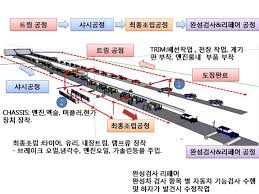

**왜 계산 그래프로 푸는가?**

In [ ]:
# 계산 그래프의 이점
# 1. 국소적 계산: 전체가 아무리 복잡해도, 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다.
# 2. 계산 그래프는 중간 계산 결과를 모두 보관할 수 있습니다.
# 3. 실제 계산 그래프를 사용하는 가장 큰 이유는 역전파를 통해 '미분'을 효율적으로 계산할 수 있는 점에 있습니다.

# 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는 지를 알고 싶다. : 사과 가격에 대한 지불 금액의 미분을 구하는 문제에 해당.
# 사과 값이 아주 조금 올랐을 때, 지불 금액이 얼마나 증가하느냐를 표시.
# 계산 그래프의 이점: 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것.

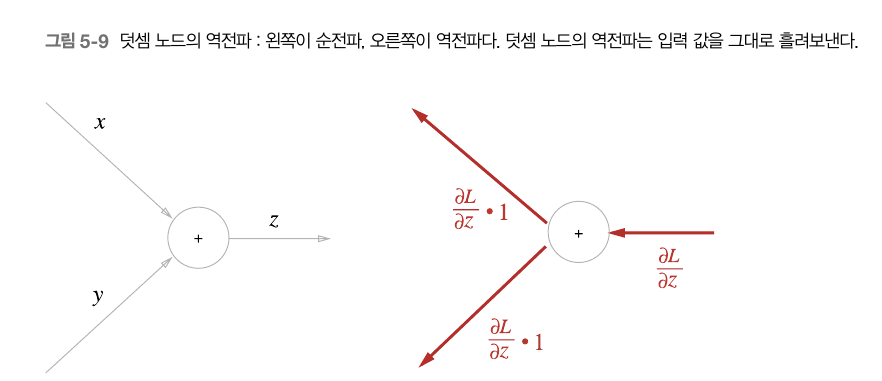

In [ ]:
# 합성 함수의 미분: 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

# 덧셈 노드 역전파: 입력 신호를 다음 노드로 출력할 뿐.

# 곱셈 노드 역전파: 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값;을 곱해서 하류로 보냅니다.
# 서로 바꾼 값이란 아래 그림처럼 순전파 때 x였다면, 역전파에서는 y, 순전파 때 y였다면 역전파에서는 x로 바꾼다는 의미.
# 곱셈의 역전파: 순방향 입력 신호의 값이 필요합니다. 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 저장해 둡니다.

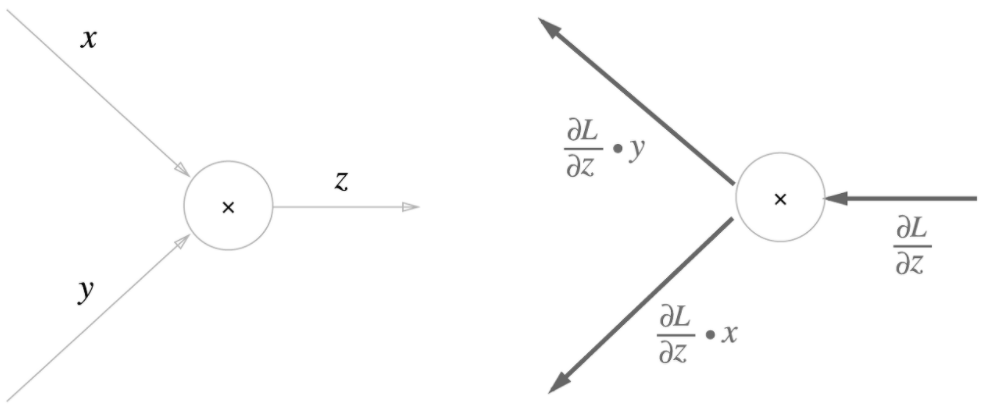

**역전파**

In [1]:
class MulLayer:
  def __init__(self):
    self.x=None
    self.y=None

  def forward(self, x, y):
    self.x=x
    self.y=y
    out = x*y

    return out
# forward(): x와 y를 인수로 받고, 두 값을 곱해서 반환합니다.
# backward(): 상류에서 넘어온 미분(dout)에 순전파 때의 값을 '서로 바꿔' 곱한 후 하류로 흘립니다.

  def backward(self, dout):
    dx=dout * self.y
    dy=dout * self.x

    return dx, dy

In [2]:
apple=100
apple_num=2
tax=1.1

# 계층들
mul_apple_layer=MulLayer()
mul_tax_layer=MulLayer()

# 순전파
apple_price=mul_apple_layer.forward(apple, apple_num)
price=mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [ ]:
# 역전파
dprice=1
dapple_price, dtax=mul_tax_layer.backward(dprice)
dapple, dapple_num=mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

# backward() 호출 순서: forward() 때와는 반대입니다.
# backward()가 받는 인수는 '순전파의 출력에 대한 미분'임에 주의.

**덧셈 계층**

In [6]:
class AddLayer:
  def __init__(self):
    self.x=None
    self.y=None
# pass:덧셈 계층에서는 초기화가 필요 없으니, __init__()에서는 아무 일도 하지 않습니다.

  def forward(self, x, y):
    out=x+y
    return out
# 덧셈 계층의 forward()에서는 입력받은 두 인수 x, y를 더해서 반환합니다.

  def backward(self, dout):
    dx=dout*1
    dy=dout*1

    return dx, dy
 # #backward(): 상류에서 내려온 미분(dout)을 그대로 하류로 흘릴 뿐입니다.

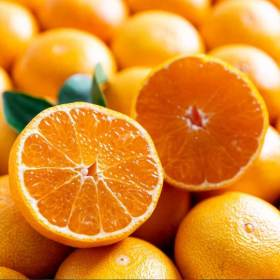

In [8]:
apple=100
apple_num=2
orange=150
orange_num=3
tax=1.1

# 계층들
mul_apple_layer=MulLayer()
mul_orange_layer=MulLayer()
add_apple_orange_layer=AddLayer()
mul_tax_layer=MulLayer()

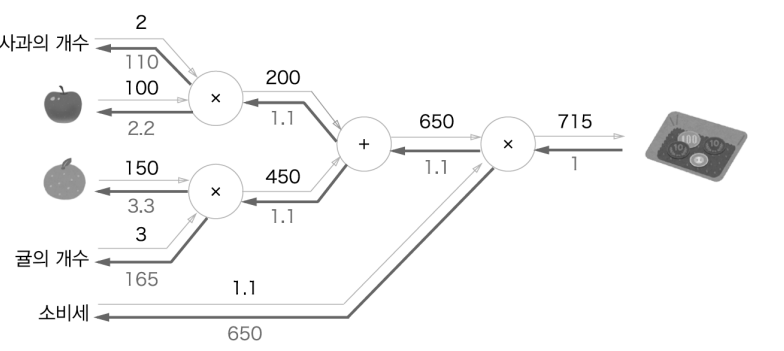

In [9]:
# 순전파
apple_price=mul_apple_layer.forward(apple,apple_num)
orange_price=mul_orange_layer.forward(orange,orange_num)
all_price=add_apple_orange_layer.forward(apple_price,orange_price)
price=mul_tax_layer.forward(all_price,tax)

# 역전파
dprice=1
dall_price, dtax=mul_tax_layer.backward(dprice)
dapple_price,dorange_price=add_apple_orange_layer.backward(dall_price)
dorange,dorange_num=mul_orange_layer.backward(dorange_price)
dapple,dapple_num=mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650
